In [1]:
import numpy as np
import json
from pprint import pprint

from collections import defaultdict
import operator

import matplotlib.pyplot as plt; plt.rcdefaults()


import seaborn as sns

import sys
sys.path.append('../src')
import os
from tqdm import tqdm
from utils import rad2degree
from panoramic_camera import PanoramicCamera as camera


In [2]:
def imshow(img):
    import cv2
    import IPython
    _,ret = cv2.imencode('.jpg', img) 
    i = IPython.display.Image(data=ret)

In [3]:
data = json.load(open('../data/train.json'))

In [4]:
pprint(data[0])

{'actions': [{'act_deg_list': [[[-54.46812048841895, -29.394853246420993],
                                [160.91728306933157, 66.58795765885363],
                                [-173.4327169306684, 40.48795765885364],
                                [-129.1077169306683, 6.962957658853615],
                                [-63.85771693066823, -10.587042341146464],
                                [15.792283069331631, -19.587042341146567],
                                [85.76728306933164, -14.187042341146672],
                                [143.59228306933161, -2.712042341146572],
                                [-140.80771693066825, -3.8370423411466037],
                                [-108.40771693066822, -3.8370423411466037]],
                               [[-108.40771693066822, -3.8370423411466037]],
                               [[-108.40771693066822, -3.8370423411466037],
                                [-108.40771693066822, -3.8370423411466037],
                          

In [5]:
width = 4552
height = 2276
canvas = np.zeros((height,width))

pbar = tqdm(data)
size = 5
min_x, min_y, max_x, max_y = width, height, 0, 0

for ii,instance in enumerate(pbar):
  gt_longitude, gt_latitude = instance['xlng_deg'],instance['ylat_deg']
  
  gt_x = int(width * ((gt_longitude)/360.0))
  gt_y = int(height - height * ((gt_latitude + 90)/180.0))
  canvas[gt_y-size:gt_y+size,gt_x-size:gt_x+size] = 1.0
  
  min_x = min(min_x,gt_x)
  min_y = min(min_y,gt_y)
  
  max_x = max(max_x,gt_x)
  max_y = max(max_y,gt_y)

pbar.close()

100%|██████████| 13287/13287 [00:00<00:00, 268772.54it/s]


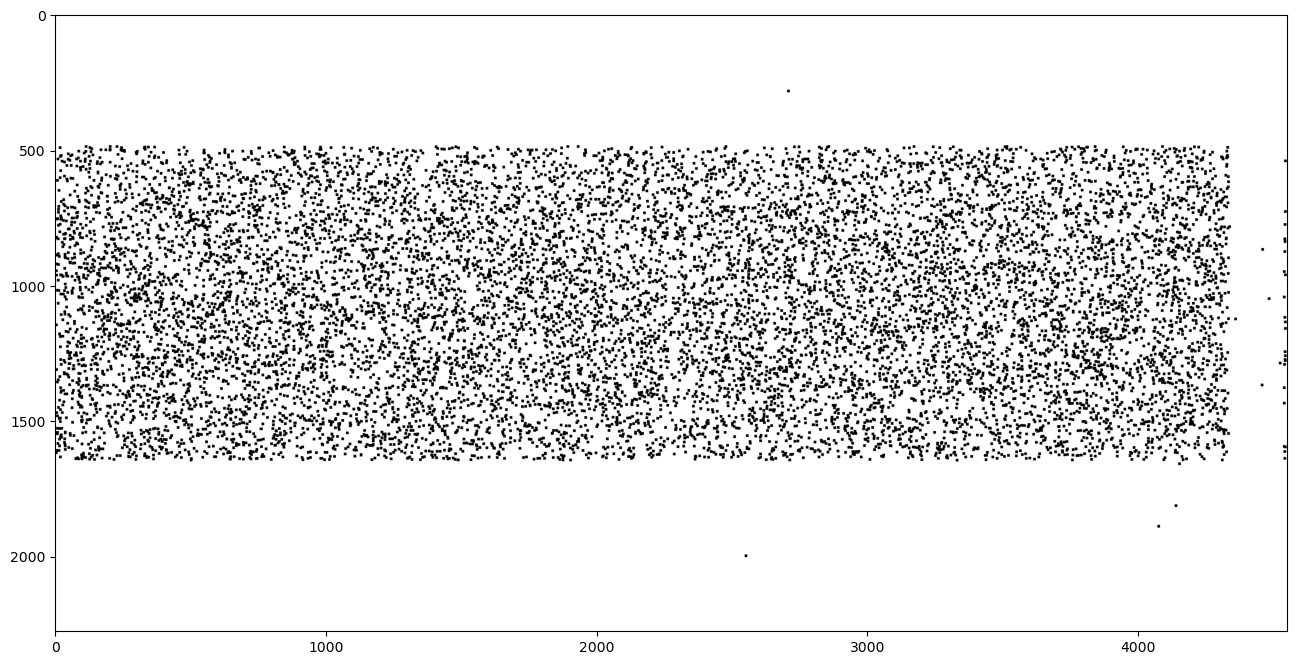

In [6]:
fig, ax = plt.subplots(figsize=(16,8))


inverted = np.ones(canvas.shape) - canvas
imgplot = plt.imshow(inverted, cmap='gray')